In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:f}'.format

In [49]:
from scipy.stats import gaussian_kde, trimboth, trim1
from scipy.stats import rv_continuous
from scipy.stats import expon, norminvgauss, norm, laplace_asymmetric, cauchy, gennorm, johnsonsu, nct, fatiguelife, exponweib, betaprime, exponpow, invgauss, invgamma, genexpon 

In [50]:
import scipy.stats
from scipy.stats import kstest, probplot
import multiprocessing
import warnings
import signal

In [51]:
def inheritors(klass):
    subclasses = set()
    work = [klass]
    while work:
        parent = work.pop()
        for child in parent.__subclasses__():
            name = child.__name__
            if name not in subclasses:
                subclasses.add(name)
                work.append(child)
    return subclasses
result = list(sorted(map(str, inheritors(rv_continuous))))
dist_names = [x[:-4] for x in result]

In [52]:
def find_distribution(d: np.array, timeout=50):
    warnings.filterwarnings('ignore')
    run = [False]
    start = 0

    def signal_handler(signum, frame):
        if run:
            raise RuntimeError("Timed out!")

    signal.signal(signal.SIGALRM, signal_handler)

    for dist_name in dist_names[start:]:
        try:
            dist = getattr(scipy.stats, dist_name)
        except:
            print("Not found: ", dist_name)
            continue
        try:
            signal.alarm(timeout)
            run[0] = True
            p = dist.fit(d)
        except RuntimeError as e:
            print("Timeout: ", dist_name)
            continue
        except Exception as e:
            print("Error: ", dist_name, e)
            continue
        finally:
            run[0] = False
            signal.alarm(0)
        res = kstest(d, dist(*p).cdf)
        if res.pvalue > 0.0:
            print(dist_name, "pvalue=", res.pvalue, p)
        else:
            print(dist_name, "fail", res.pvalue)

In [53]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [54]:
df = full_df.dropna()
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,...,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000
mean,55.376047,450.066734,45.003869,0.813560,36.023390,11.631804,11.426203,0.203043,1.188133,-12.451774,...,1.575211,0.346227,0.151245,6.354578,2.724658,6.028347,1.557162,0.092230,392.428946,1046719.733046
std,41.238244,471.538127,23.808488,1.963560,88.421331,27.175665,26.936827,2.015606,7.017669,218.369774,...,0.906859,0.475776,0.358294,4.661053,1.315672,2.102735,0.615148,0.289356,237.348045,28115.431954
min,0.582500,0.000000,-1.422500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2867.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1000001.000000
25%,31.882500,134.250000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,5.000000,1.000000,0.000000,228.000000,1022604.000000
50%,44.335000,305.500000,42.490000,0.000000,1.000000,0.390000,0.000000,0.000000,0.000000,-5.000000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,351.000000,1045265.000000
75%,65.697500,601.500000,58.000000,0.742500,33.500000,11.200000,10.937500,0.000000,0.292500,54.500000,...,2.000000,1.000000,0.000000,10.000000,3.000000,7.000000,2.000000,0.000000,535.000000,1071026.000000
max,672.015000,6103.750000,349.572500,72.765000,2018.000000,528.600000,528.600000,113.880000,476.812500,4480.000000,...,11.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1406.000000,1099977.000000


In [55]:
def prepare_data(df: pd.DataFrame,
                 feature: str, 
                 left_quanlile: float = 0.001, 
                 right_quanlile: float = 0.001) -> np.array:
    data = df[feature].to_numpy()
    data = trim1(data, left_quanlile, 'left')
    data = trim1(data, right_quanlile, 'right')
    return data

In [61]:
# from scipy.stats import gaussian_kde, trimboth, trim1

# for feature in full_df.columns:
#     print(feature)
    
#     data = prepare_data(df, feature)
#     plt.figure(figsize = (20,5))
#     plt.hist(data, bins=500)
#     plt.show()

In [62]:
def describe_data(data: np.array, bins=50):
    print(pd.DataFrame(data).describe())
    
    plt.figure(figsize = (20,5))
    plt.hist(data, bins=bins, density=True)

    kde = gaussian_kde(data)
    tiks = np.arange(data.min(), data.max() + 1, 1)
    plt.plot(tiks, kde(tiks))
    plt.show()

    plt.boxplot(data)
    plt.show()

In [82]:
from scipy.stats import rv_continuous

class tri_modal_gen(rv_continuous):
#     def __init__(weight_0: float, mean_0: float, stdv_0: float,
#                 weight_1: float, mean_1: float, stdv_1: float,
#                 weight_2: float, mean_2: float, stdv_2: float):

#         self.weight_0 = weight_0 / sum([weight_0, weight_1, weight_2])
#         self.mean_0 = mean_0
#         self.stdv_0 = stdv_0
#         self.weight_1 = weight_1 / sum([weight_0, weight_1, weight_2])
#         self.mean_1 = mean_1
#         self.stdv_1 = stdv_1
#         self.weight_2 = weight_2 / sum([weight_0, weight_1, weight_2])
#         self.mean_2 = mean_2
#         self.stdv_2 = stdv_2
    
    def _pdf(self, x, 
                weight_0: float, mean_0: float, stdv_0: float,
                weight_1: float, mean_1: float, stdv_1: float,
                weight_2: float, mean_2: float, stdv_2: float):
        
        return  weight_0 * stats.norm.pdf(x, mean_0, stdv_0) + \
                weight_1 * stats.norm.pdf(x, mean_1, stdv_1) + \
                weight_2 * stats.norm.pdf(x, mean_2, stdv_2)
    
#     def _fitstart(data):
#         return 0.2, 10, 5, 0.6, 30, 5, 0.2, 50, 5, 40, 5

    def _argcheck(weight_0: float, mean_0: float, stdv_0: float,
                  weight_1: float, mean_1: float, stdv_1: float,
                  weight_2: float, mean_2: float, stdv_2: float):
        return 0.99 < weight_0 + weight_1 + weight_2 < 1.01
    
#     def _cdf(x, dist: List[Tuple[float, float, float]]):
#         return sum(weight * stats.norm.cdf(x, mean, stdv) for weight, mean, stdv in dist)

# def describe_multimodal_distribution(data: np.array, dist: List[Tuple[float, float, float]], bins=50, k=1000):
#     data = np.random.choice(data, k, replace=False)
    
# #     p = dist.fit(data, method='MM')
# #     print(p)
# #     probplot(data, plot=plt, dist=dist(*p))
# #     plt.show()

# #     p = dist.fit(data, method='MLE')
# #     print(p)
# #     probplot(data, plot=plt, dist=dist(*p))
# #     plt.show()

#     sample2 = np.concatenate((stats.norm.rvs(mean1, stdv1, size=n1),
#                          (stats.norm.rvs(mean2, stdv2, size=n - n1))))

#     probplot(data, plot=plt, dist=dist(*p))
#     plt.show()

#     print(kstest(data, cdf=multimodal_cdf, args=dist))

#     kde = gaussian_kde(data)
#     tiks = np.arange(data.min(), data.max() + 1, 1)
    
#     plt.figure(figsize = (20,5))
#     plt.hist(data, bins=bins, density=True)
#     plt.plot(tiks, kde(tiks), label='data')
#     plt.plot(tiks, dist(*p).pdf(tiks), label='estimation')
#     plt.legend()
#     plt.show()

In [90]:
def describe_distribution(data: np.array, dist, bins=50, k=1000, params=None):
    data = np.random.choice(data, k, replace=False)
    
#     p = dist.fit(data, method='MM')
#     print(p)
#     probplot(data, plot=plt, dist=dist(*p))
#     plt.show()

#     p = dist.fit(data, method='MLE')
#     print(p)
#     probplot(data, plot=plt, dist=dist(*p))
#     plt.show()

    if params is not None:
        p = dist.fit(data)
    else:
        p = dist.fit(data, 0.2, 10, 5, 0.6, 30, 5, 0.2, 50, 5)
    print(p)
    probplot(data, plot=plt, dist=dist(*p))
    plt.show()

    print(kstest(data, dist(*p).cdf))

    kde = gaussian_kde(data)
    tiks = np.arange(data.min(), data.max() + 1, 1)
    
    plt.figure(figsize = (20,5))
    plt.hist(data, bins=bins, density=True)
    plt.plot(tiks, kde(tiks), label='data')
    plt.plot(tiks, dist(*p).pdf(tiks), label='estimation')
    plt.legend()
    plt.show()

## 'rev_Mean' - Mean monthly revenue (charge amount)

                 0
count 26572.000000
mean     53.915718
std      35.187164
min       0.582500
25%      31.805625
50%      44.136250
75%      65.115625
max     261.832500


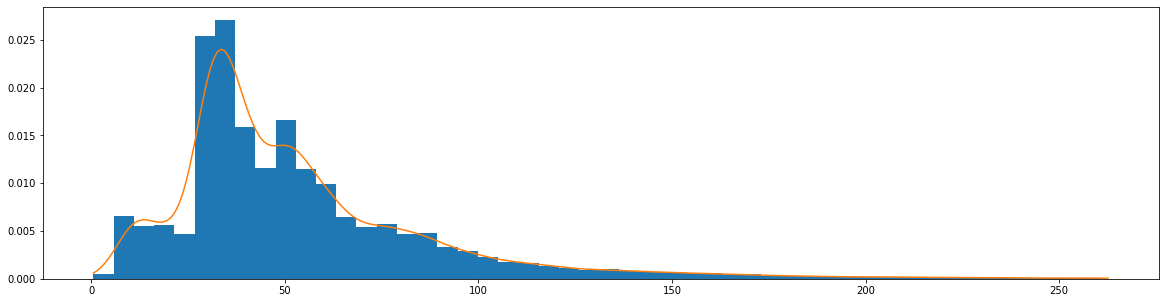

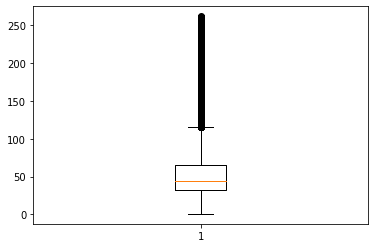

TypeError: fit() missing 1 required positional argument: 'data'

In [91]:
data = prepare_data(df=df, feature='rev_Mean', left_quanlile = 0.0, right_quanlile = 0.005)
# find_distribution(data)
describe_data(data)
describe_distribution(data, tri_modal_gen, bins=1000, params=[0.2, 10, 5, 0.6, 30, 5, 0.2, 50, 5])

## 'mou_Mean' - Mean number of monthly minutes of use

                 0
count 26653.000000
mean    446.683868
std     454.920986
min       0.000000
25%     134.500000
50%     305.500000
75%     601.000000
max    3549.250000


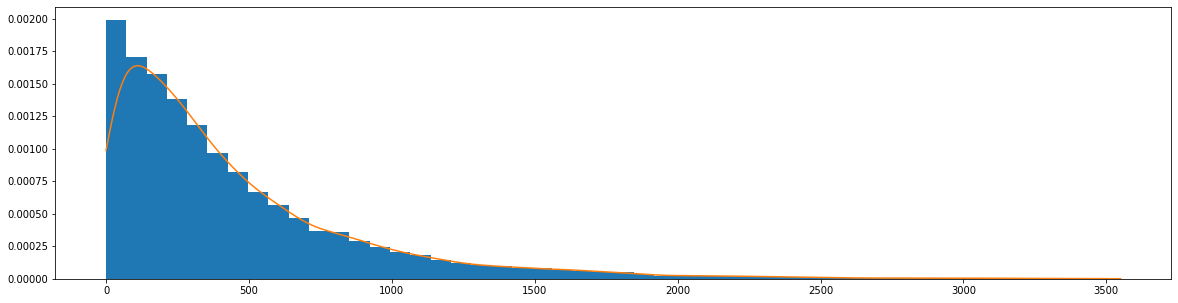

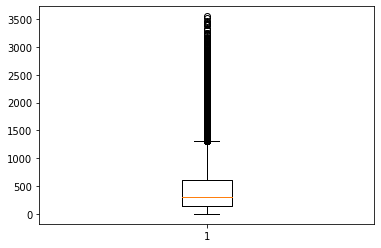

(0.0, 459.23216666660005)


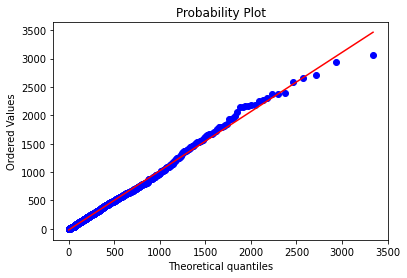

KstestResult(statistic=0.03058419409673231, pvalue=0.30076312239590364)


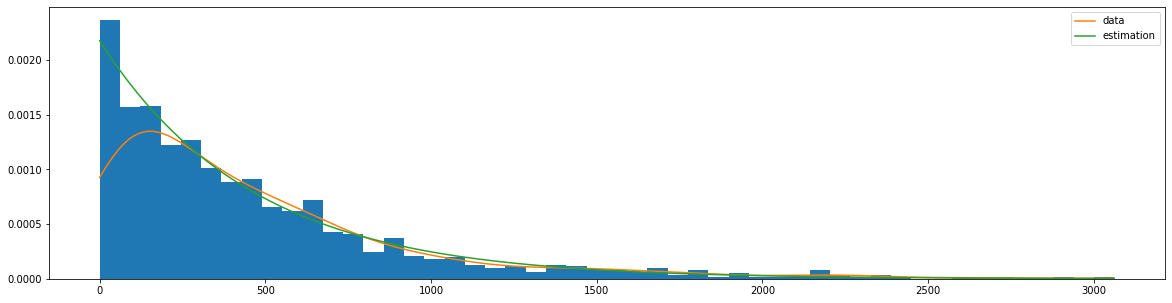

In [73]:
data = prepare_data(df=df, feature='mou_Mean')
describe_data(data)
describe_distribution(data, expon)

## 'mou_peav_Mean' - Mean unrounded minutes of use of peak voice calls

                 0
count 26679.000000
mean    162.423189
std     196.477646
min       0.000000
25%      33.815000
50%     103.706667
75%     214.310000
max    1779.936667


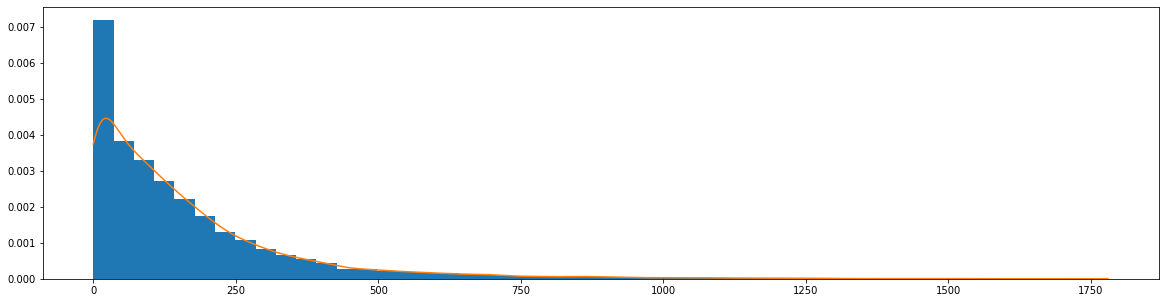

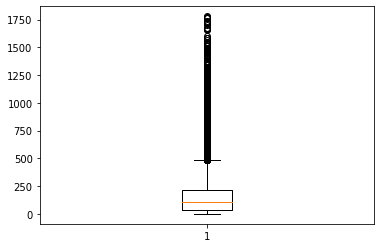

(2.0703913679342616, -50.327160657343654, 255.84416408505467)


/usr/local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


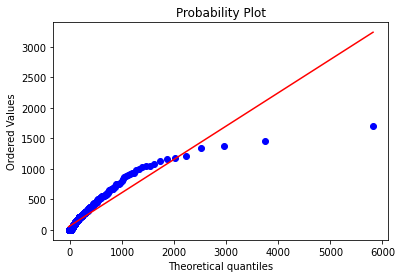

KstestResult(statistic=0.056771629689795655, pvalue=0.0030458948499791196)


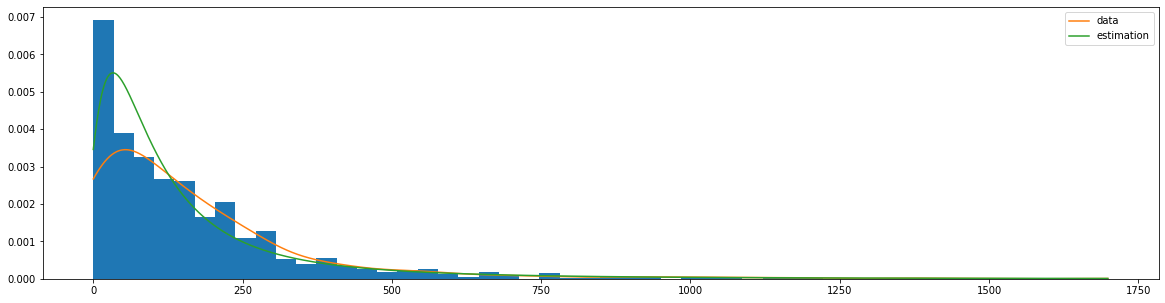

In [19]:
data = prepare_data(df=df, feature='mou_peav_Mean', left_quanlile = 0.0, right_quanlile = 0.001)
describe_data(data)
# find_distribution(data)
describe_distribution(data, invgamma)

## 'opk_vce_Mean' - Mean unrounded minutes of use of off-peak voice calls

                 0
count 23795.000000
mean    132.833723
std     166.676291
min       0.243333
25%      25.096667
50%      69.300000
75%     170.880000
max     995.693333


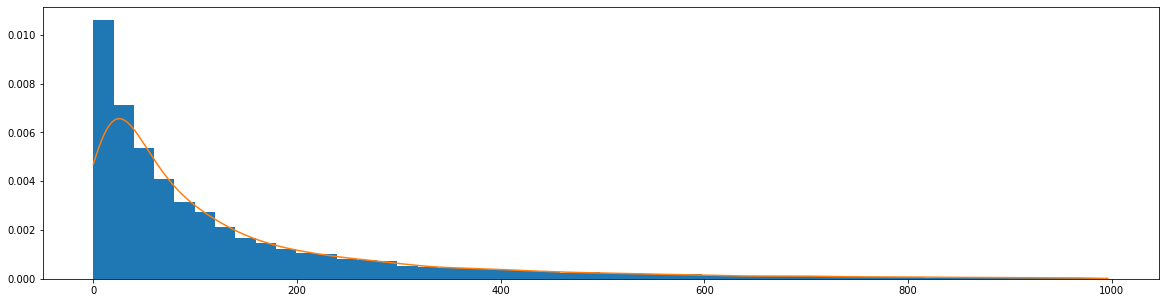

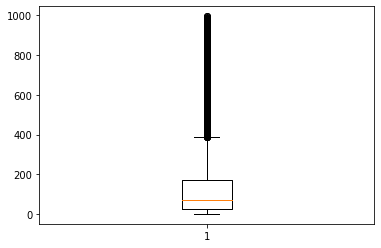

(1.2457288340649628, -16.200271333469793, 73.65306524138276)


/usr/local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


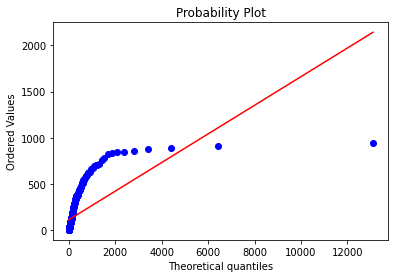

KstestResult(statistic=0.052628265915032335, pvalue=0.12094895621108948)


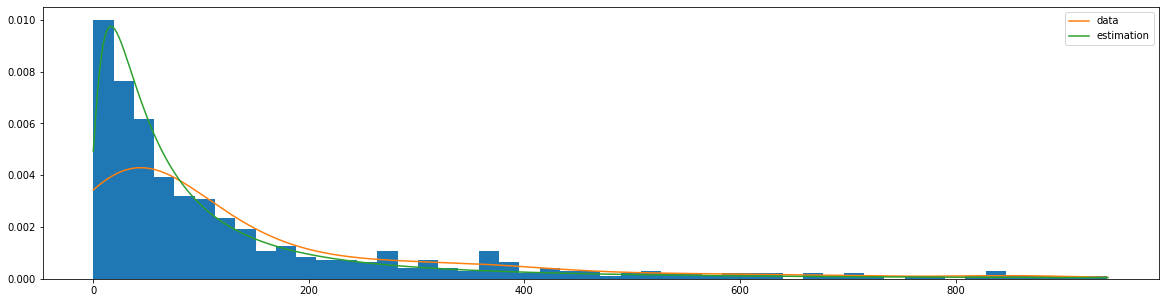

In [20]:
data = prepare_data(df=df, feature='mou_opkv_Mean', left_quanlile = 0.1, right_quanlile = 0.01)
describe_data(data)
# find_distribution(data)
describe_distribution(data, invgamma, k=500)

                 0
count 26653.000000
mean    -12.398478
std     202.565826
min   -1471.000000
25%     -72.750000
50%      -5.000000
75%      54.250000
max    1323.250000


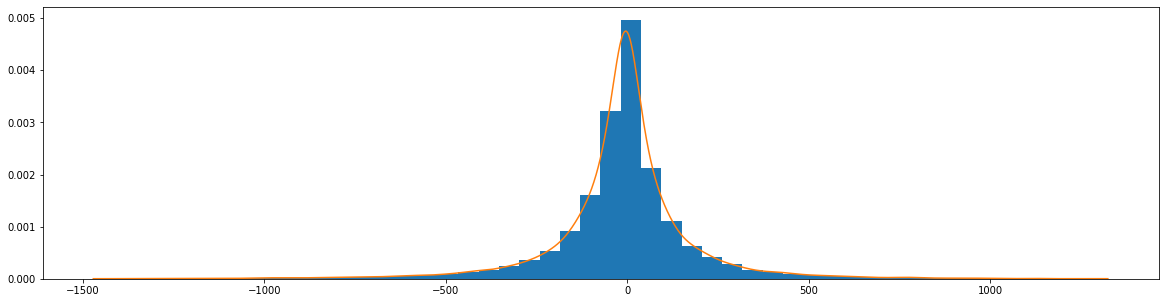

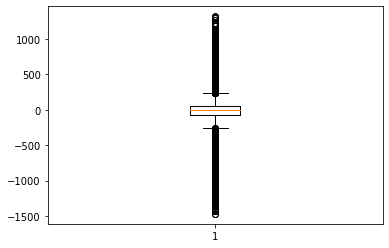

(0.0798345403696622, 0.6887876156125563, 0.21914426915079982, 53.52368790968622)


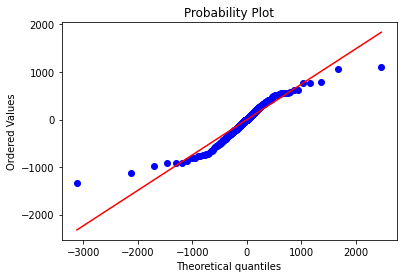

KstestResult(statistic=0.022367108734079433, pvalue=0.6903382768854724)


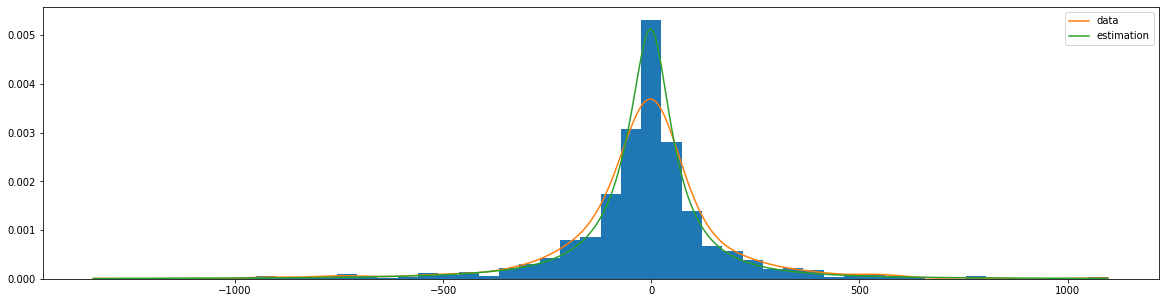

In [25]:
data = prepare_data(df=df, feature='change_mou', left_quanlile = 0.001, right_quanlile = 0.001)
# find_distribution(data)
describe_data(data)
describe_distribution(data, johnsonsu)

                 0
count 26653.000000
mean    391.948374
std     235.633346
min       0.000000
25%     229.000000
50%     351.000000
75%     534.000000
max    1234.000000


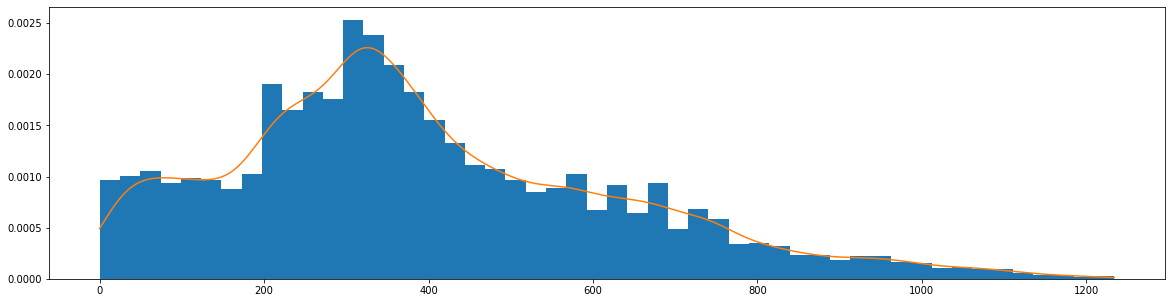

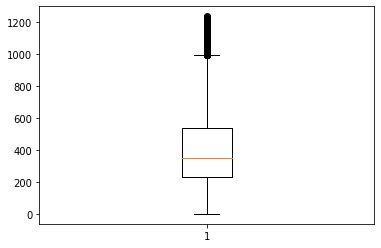

(-9.188761787534311, 2.881711037779861, -292.58445795140653, 52.36187969724044)


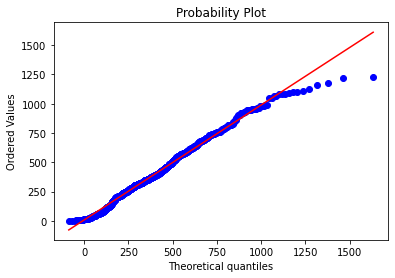

KstestResult(statistic=0.03211659978336397, pvalue=0.2482916591505958)


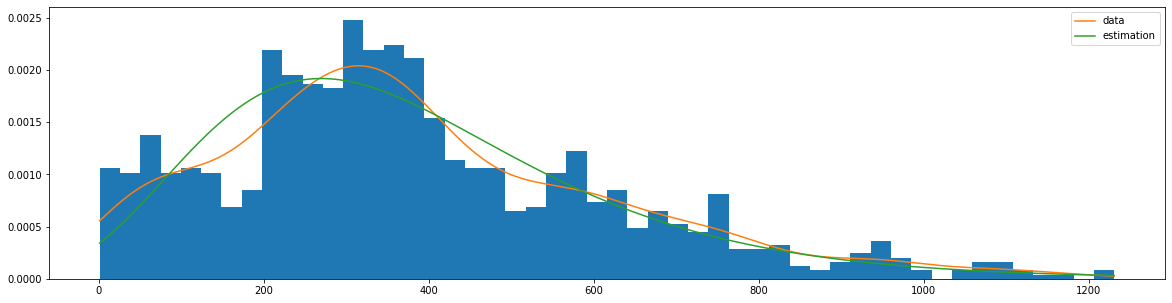

In [23]:
data = prepare_data(df=df, feature='eqpdays', left_quanlile = 0.001, right_quanlile = 0.001)

# find_distribution(data)
describe_data(data)
describe_distribution(data, johnsonsu)

                 0
count 26413.000000
mean      0.718872
std       2.160761
min       0.000000
25%       0.000000
50%       0.000000
75%       0.257500
max      21.000000


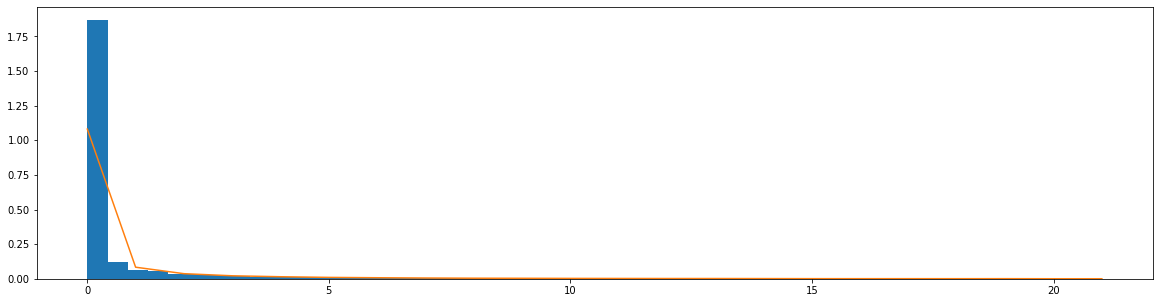

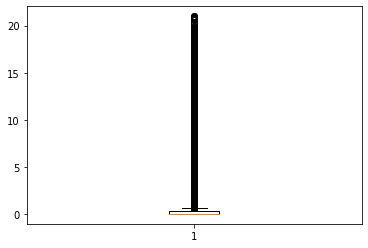

(19675.888350327685, -6.757149334532534e-10, 1.7943613797319707e-09)


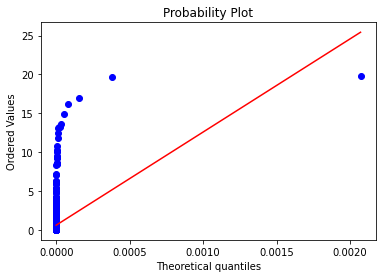

KstestResult(statistic=0.5778024868299932, pvalue=4.267409e-317)


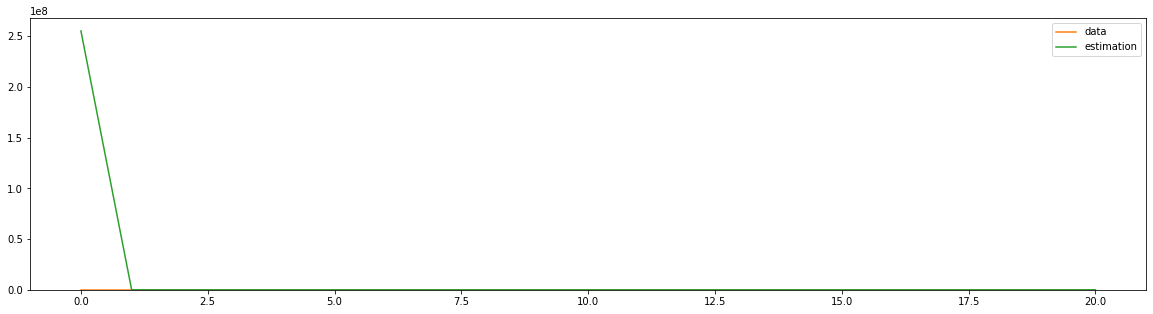

In [36]:
data = prepare_data(df=df, feature='roam_Mean', left_quanlile = 0.001, right_quanlile = 0.01)

# find_distribution(data, timeout=10)
describe_data(data)
describe_distribution(data, invgauss)